# Tutorial 1

In [3]:
from imports import *
import staircase as sc
%matplotlib inline
from hotstepper.utilities.helpers import prepare_input,get_value,prepare_datetime,get_dt
import operator
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv(r"../data/hotel_stays.csv", parse_dates=['check_in', 'check_out'], dayfirst=True)
hotel_stays = Steps(True).add_direct(df.check_in, df.check_out)
df.shape


(13602, 6)

In [5]:
#%%timeit -r 3 -n 3
#hotel_stays = Steps.read_dataframe(df,'check_in', 'check_out')
hotel_stays = Steps(True).add_direct(df.check_in, df.check_out)
#hotel_stays = Steps.read_array(df.check_in, df.check_out)
#aborted_type1 = Steps.read_dataframe(df,'arrived','aborted')
#duration_type1 = Steps.read_dataframe(df,'answered','complete')

In [6]:
hcl = hotel_stays.clip(lbound=pd.Timestamp(2016,8,1))
hcu = hotel_stays.clip(ubound=pd.Timestamp(2016,5,1))

print(hotel_stays._start,hcl._start,hcu._start)

2015-12-08 15:33:00 2016-08-01 05:32:00 2015-12-08 15:33:00


In [7]:
#%%timeit -r 3 -n 3
queue = sc.Stairs(use_dates=True).layer(df.check_in, df.check_out)

In [6]:
print(queue.integrate(),queue.mean(),queue.var(),queue.mode(),queue.median(),queue.min(),queue.max(),queue.percentile(50),queue.percentile(37))
print(hotel_stays.integrate(),hotel_stays.mean(),hotel_stays.var(),hotel_stays.mode(), hotel_stays.median(),hotel_stays.min(),hotel_stays.max(),hotel_stays.percentile(50),hotel_stays.percentile(37))

1212706.5166666664 125.50974324475835 3020.7530280477886 1 146.0 0 187 146.0 120.0
1212706.5166666668 125.5097432447584 3020.7530280477786 163.0 143.0 0.0 187.0 143.0 128.0


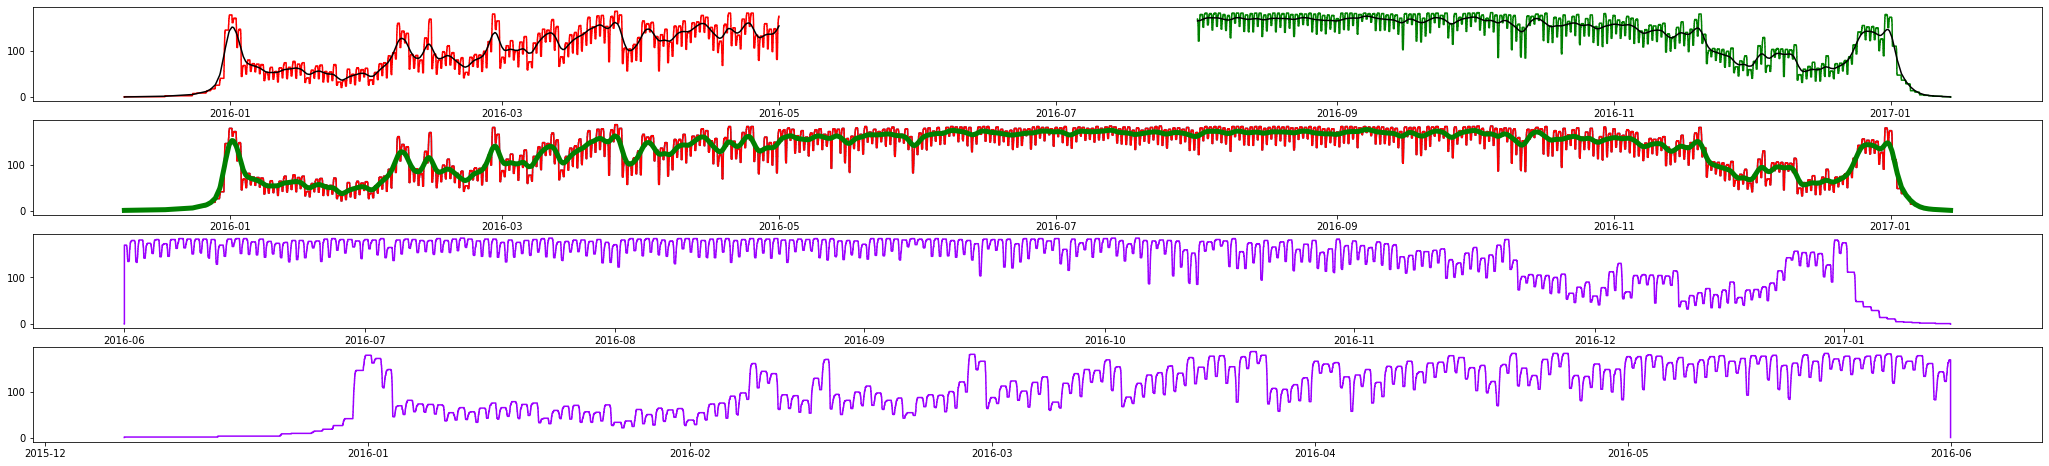

In [24]:
#st = np.array([[s._start_ts,s._direction,s._weight] for s in hotel_stays],dtype=float)
p = hotel_stays.step_keys()
fig, ax = plt.subplots(nrows=4,figsize=(36,8))

#hotel_stays.plot(ax=ax[0])
#hotel_stays.clip(ubound=pd.Timestamp(2016,5,1)).plot(ax=ax[0],color='r')
hcl = hotel_stays.clip(lbound=pd.Timestamp(2016,8,1))
hcu = hotel_stays.clip(ubound=pd.Timestamp(2016,5,1))

hcl.plot(ax=ax[0],color='g')
hcu.plot(ax=ax[0],color='r')

hcl.smooth_plot(ax=ax[0],color='black',smooth_factor=10**5)

hcu.smooth_plot(ax=ax[0],color='black',smooth_factor=10**5)
#hotel_stays.clip(lbound=pd.Timestamp(2016,8,1)).plot(ax=ax[0],color='g')

#hotel_stays.clip(lbound=pd.Timestamp(2016,8,1)).smooth_plot(ax=ax[0],color='black',linewidth=4)


queue.plot(ax=ax[1])
hotel_stays.plot(ax=ax[1],color='r')
#start=pd.Timestamp(2016,3,1),
hotel_stays.smooth_plot(ax=ax[1],color='g',linewidth=5,smooth_factor=10**5)
step_clip_start = Steps(start=pd.Timestamp(2016,6,1))
step_clip_end = Steps(end=pd.Timestamp(2016,6,1))

#step_clip = Step(end=pd.Timestamp(2016,6,1))
#step_clip = Step(start=pd.Timestamp(2016,3,1),end=pd.Timestamp(2016,6,1))
#((hotel_stays>>pd.Timedelta(days=10))*step_clip).plot(ax=ax[2],color='r')
#(hotel_stays-(hotel_stays*step_clip)).plot(ax=ax[2],color='g')

#hotel_stays.clip(ubound=pd.Timestamp(2016,6,1)).plot(ax=ax[3],color='g')
(hotel_stays*step_clip_start).plot(ax=ax[2])
(hotel_stays*step_clip_end).plot(ax=ax[3])

#(hotel_stays*step_clip).plot(ax=ax[2],color='r')
#(hotel_stays-Step(start=pd.Timestamp(2016,9,1),weight=200)).plot(ax=ax[2],color='black')
#print(p[100],t[100],x[100],Utils.prepare_datetime(p[100]))
#plt.savefig('hotel_multiplots_baseline.png')

0.12303379992582818
0.8769662000741719


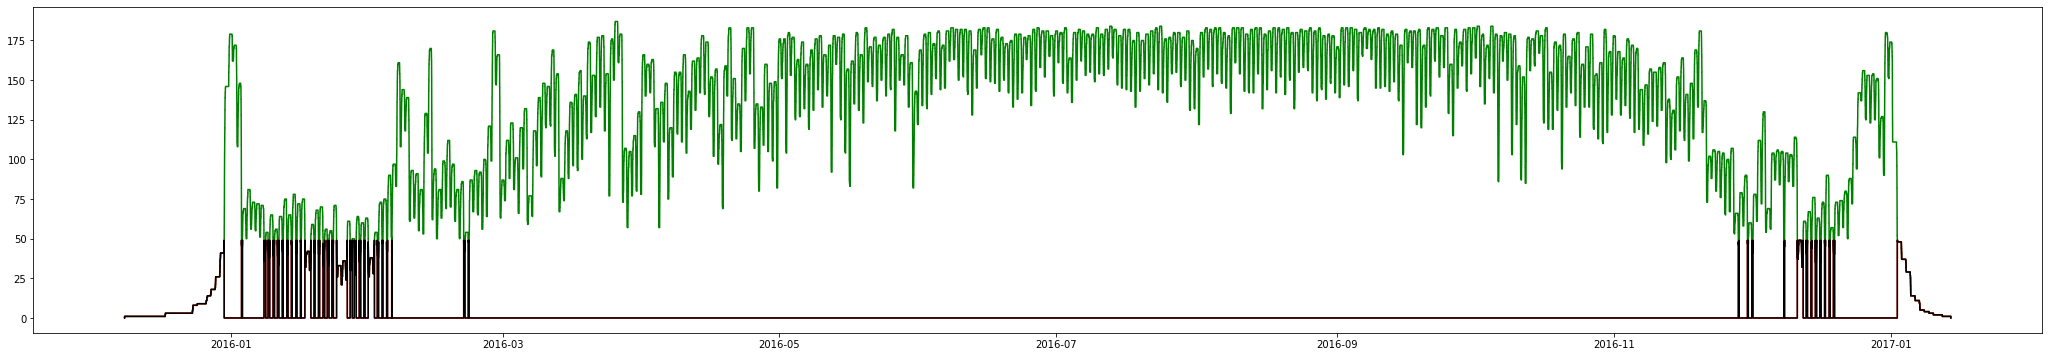

In [25]:
timespan = {'lbound':pd.Timestamp(2020,2,15,10),'ubound':pd.Timestamp(2020,2,16)}
ax = hotel_stays.plot(color='g',figsize=(36,6))
hotel125 = (hotel_stays<50)
hotel125.plot(ax=ax,color='r')
((25+hotel125)-25).plot(ax=ax,color='black')
f = ax.get_figure()

f.savefig('hotel_filter50.png')
print((hotel125.normalise().integrate())/(hotel_stays.normalise().integrate()))
print((hotel_stays.normalise() - hotel125.normalise()).integrate()/(hotel_stays.normalise().integrate()))

True

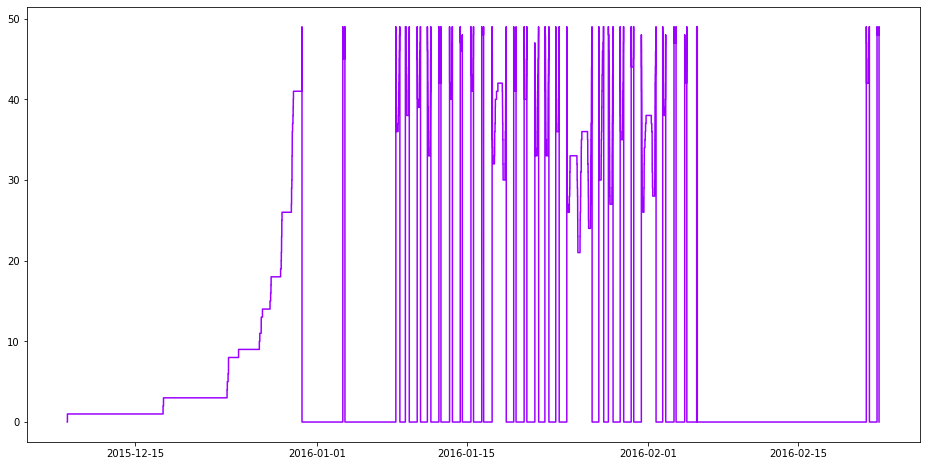

In [9]:
(hotel_stays.clip(ubound=pd.Timestamp(2016,3,1))==hotel125).plot()
hotel125.compare(hotel125)

In [10]:
step_clip = Steps(start=pd.Timestamp(2016,3,1),end=pd.Timestamp(2016,5,10))
mul = (hotel_stays*step_clip)
cli = (hotel_stays.clip(lbound=pd.Timestamp(2016,3,1),ubound=pd.Timestamp(2016,5,10)))

print(cli.integrate(), mul.integrate())

cli.compare(mul)

228166.43333333338 228698.5833333333


False

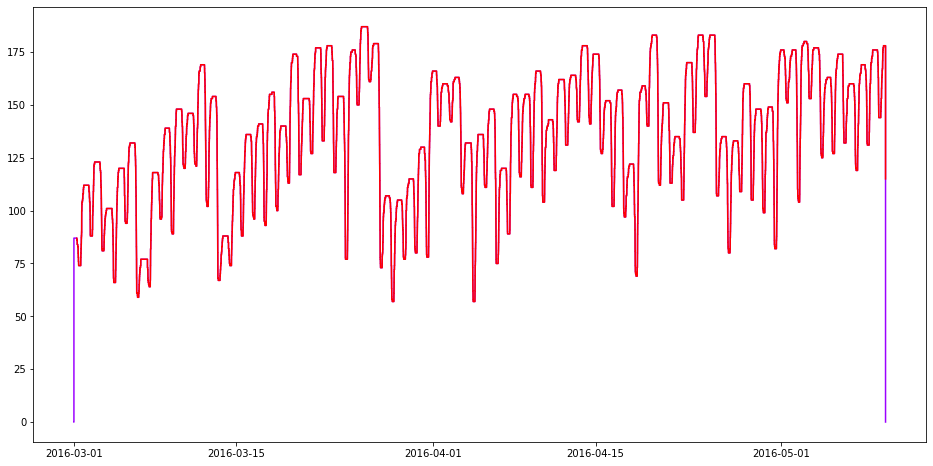

In [18]:
ax = mul.plot()
cli.plot(ax=ax,color='r')
plt.savefig('baseline2.png')

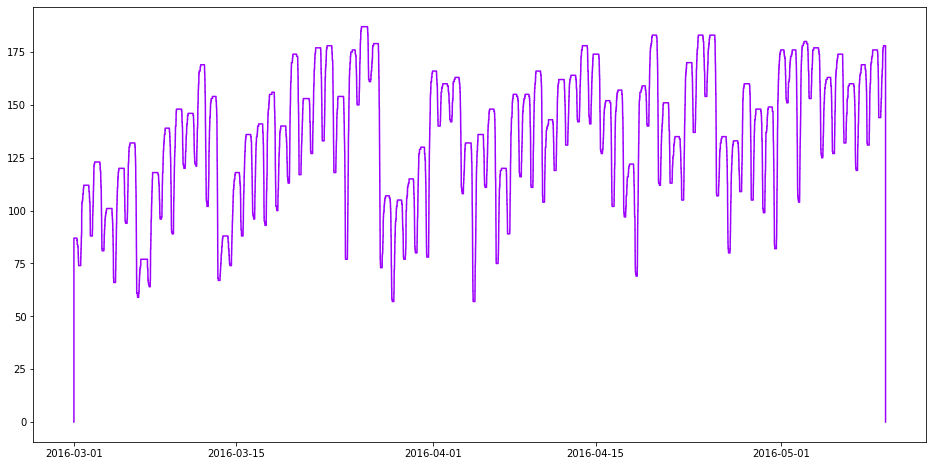

In [22]:
from matplotlib.testing.compare import compare_images

ax = mul.plot()
#cli.plot(ax=ax,color='r')
f = ax.get_figure()
f.savefig('test2.png')
#plt.savefig('test.png')

In [23]:
_ = compare_images('baseline2.png','test.png',0.00001,True)

In [12]:
%%timeit -r 5 -n 5
hotel_stays.clip(lbound=pd.Timestamp(2016,3,1),ubound=pd.Timestamp(2016,6,1))

9.92 ms ± 694 µs per loop (mean ± std. dev. of 5 runs, 5 loops each)


In [13]:
p = np.arange(hotel_stays.first(),hotel_stays.last(),pd.Timedelta(minutes=1)).astype(pd.Timestamp)

In [14]:
%%timeit -r 3 -n 3
hotel_stays(p)

1.56 s ± 26.9 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [15]:
#%%timeit -r 3 -n 3
#hotel_stays.step(p)

In [16]:
#%%timeit -r 3 -n 3
#hotel_stays.smooth_step(p)

In [17]:
%%timeit -r 3 -n 3
queue(p)

2.38 s ± 20.4 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<AxesSubplot:title={'center':'Step Values Histogram'}, xlabel='values', ylabel='frequency'>

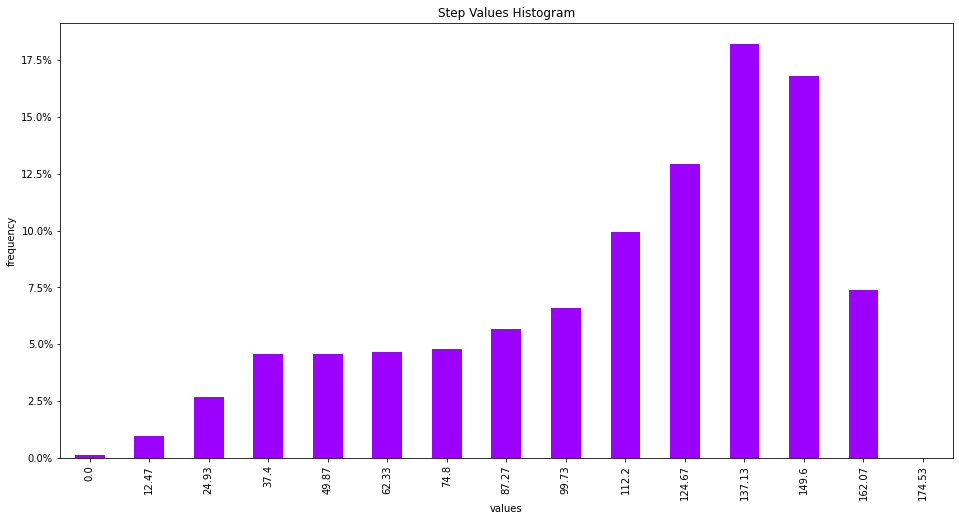

In [18]:
hotel_stays.histogram_plot(bins=15,kind='bar',xlabel='values',ylabel='frequency',label_style='t')